# Exploring Security Practices in Infrastructure as Code: An Empirical Study of AWS Terraform Configurations

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
#plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.family"] = "Arial"
plt.rcParams['figure.dpi'] = 300

In [8]:
RESULTS_FILE_GCP = "./csv/google_results.csv"
RESULTS_FILE_TFSEC = "./csv/google_results-tfsec.csv"
POLICIES_FILE = "./csv/policies-gcp-final.csv"

In [9]:
policies_tfsec = {}
policies_checkov = {}
with open(POLICIES_FILE, 'r') as f:
    f.readline()
    policies_rows = f.readlines()
    for row in policies_rows:
        s_row = row.split(',')
        if s_row[7] != "-" and s_row[8] != "-" and s_row[9] == "":
            policy_id = s_row[0]
            pol_tfsec = s_row[7]
            pol_checkov = s_row[8]

            policies_tfsec[policy_id] = pol_tfsec.split(',')
            policies_checkov[policy_id] = pol_checkov.split(',')

print(policies_tfsec)
print(policies_checkov)

{'POL01': ['AVD-GCP-0004'], 'POL02': ['AVD-GCP-0008'], 'POL03': ['AVD-GCP-0009'], 'POL04': ['AVD-GCP-0007'], 'POL06': ['AVD-GCP-0011'], 'POL08': ['AVD-GCP-0046'], 'POL09': ['AVD-GCP-0002'], 'POL10': ['AVD-AZU-0007'], 'POL11': ['AVD-GCP-0049'], 'POL13': ['AVD-GCP-0059'], 'POL14': ['AVD-GCP-0060'], 'POL15': ['AVD-GCP-0052'], 'POL16': ['AVD-GCP-0053'], 'POL17': ['AVD-GCP-0062'], 'POL18': ['AVD-GCP-0050'], 'POL19': ['AVD-GCP-0013'], 'POL21': ['AVD-GCP-0014'], 'POL22': ['AVD-GCP-0015'], 'POL23': ['AVD-GCP-0015'], 'POL24': ['AVD-GCP-0015'], 'POL27': ['AVD-GCP-0017'], 'POL28': ['AVD-GCP-0025'], 'POL29': ['AVD-GCP-0016'], 'POL30': ['AVD-GCP-0022'], 'POL31': ['AVD-GCP-0018'], 'POL32': ['AVD-GCP-0020'], 'POL33': ['AVD-GCP-0021'], 'POL34': ['AVD-GCP-003'], 'POL35': ['AVD-GCP-0037'], 'POL37': ['AVD-GCP-0029'], 'POL39': ['AVD-GCP-0043'], 'POL41': ['AVD-GCP-0030'], 'POL42': ['AVD-GCP-0035'], 'POL43': ['AVD-GCP-0027'], 'POL44': ['AVD-GCP-0031'], 'POL46': ['AVD-GCP-0039'], 'POL47': ['AVD-GCP-0033'], '

In [10]:
results_tfsec = {}
results_checkov = {}
with open(RESULTS_FILE_TFSEC, 'r') as f:
    f.readline()
    policies_rows = f.readlines()
    for row in policies_rows:
        s_row = row.split(',')
        repo_name = s_row[0]
        passed_check = s_row[3].split(";")
        failed_check = s_row[4].split(";")

        results_tfsec[repo_name] = [passed_check, failed_check]

with open(RESULTS_FILE_GCP, 'r') as f:
    f.readline()
    policies_rows = f.readlines()
    for row in policies_rows:
        s_row = row.split(',')
        repo_name = s_row[0]
        passed_check = s_row[3].split(";")
        failed_check = s_row[4].split(";")

        results_checkov[repo_name] = [passed_check, failed_check]

print(results_tfsec)


{'ine-labs/GCPGoat': [['AVD-GCP-0037', 'AVD-GCP-0037', 'AVD-GCP-0044', 'AVD-GCP-0044', 'AVD-GCP-0043', 'AVD-GCP-0043', 'AVD-GCP-0036', 'AVD-GCP-0036', 'AVD-GCP-0032', 'AVD-GCP-0032', 'AVD-GCP-0006', 'AVD-GCP-0006', 'AVD-GCP-0006', 'AVD-GCP-0006', 'AVD-GCP-0006', 'AVD-GCP-0011', 'AVD-GCP-0011', 'AVD-GCP-0011', 'AVD-GCP-0011', 'AVD-GCP-0011', 'AVD-GCP-0003', 'AVD-GCP-0003', 'AVD-GCP-0003', 'AVD-GCP-0003', 'AVD-GCP-0003', 'AVD-GCP-0002'], ['AVD-GCP-0045', 'AVD-GCP-0045', 'AVD-GCP-0041', 'AVD-GCP-0041', 'AVD-GCP-0030', 'AVD-GCP-0030', 'AVD-GCP-0027', 'AVD-GCP-0031', 'AVD-GCP-0031', 'AVD-GCP-0033', 'AVD-GCP-0033', 'AVD-GCP-0066', 'AVD-GCP-0066', 'AVD-GCP-0066', 'AVD-GCP-0066', 'AVD-GCP-0066', 'AVD-GCP-0002', 'AVD-GCP-0002', 'AVD-GCP-0002', 'AVD-GCP-0002', 'AVD-GCP-0001', 'AVD-GCP-0001', 'AVD-GCP-0001', 'AVD-GCP-0001']], 'terraform-google-modules/terraform-google-sql-db': [['AVD-GCP-0015', 'AVD-GCP-0006', 'AVD-GCP-0006', 'AVD-GCP-0006', 'AVD-GCP-0011', 'AVD-GCP-0011', 'AVD-GCP-0011', 'AVD-GC

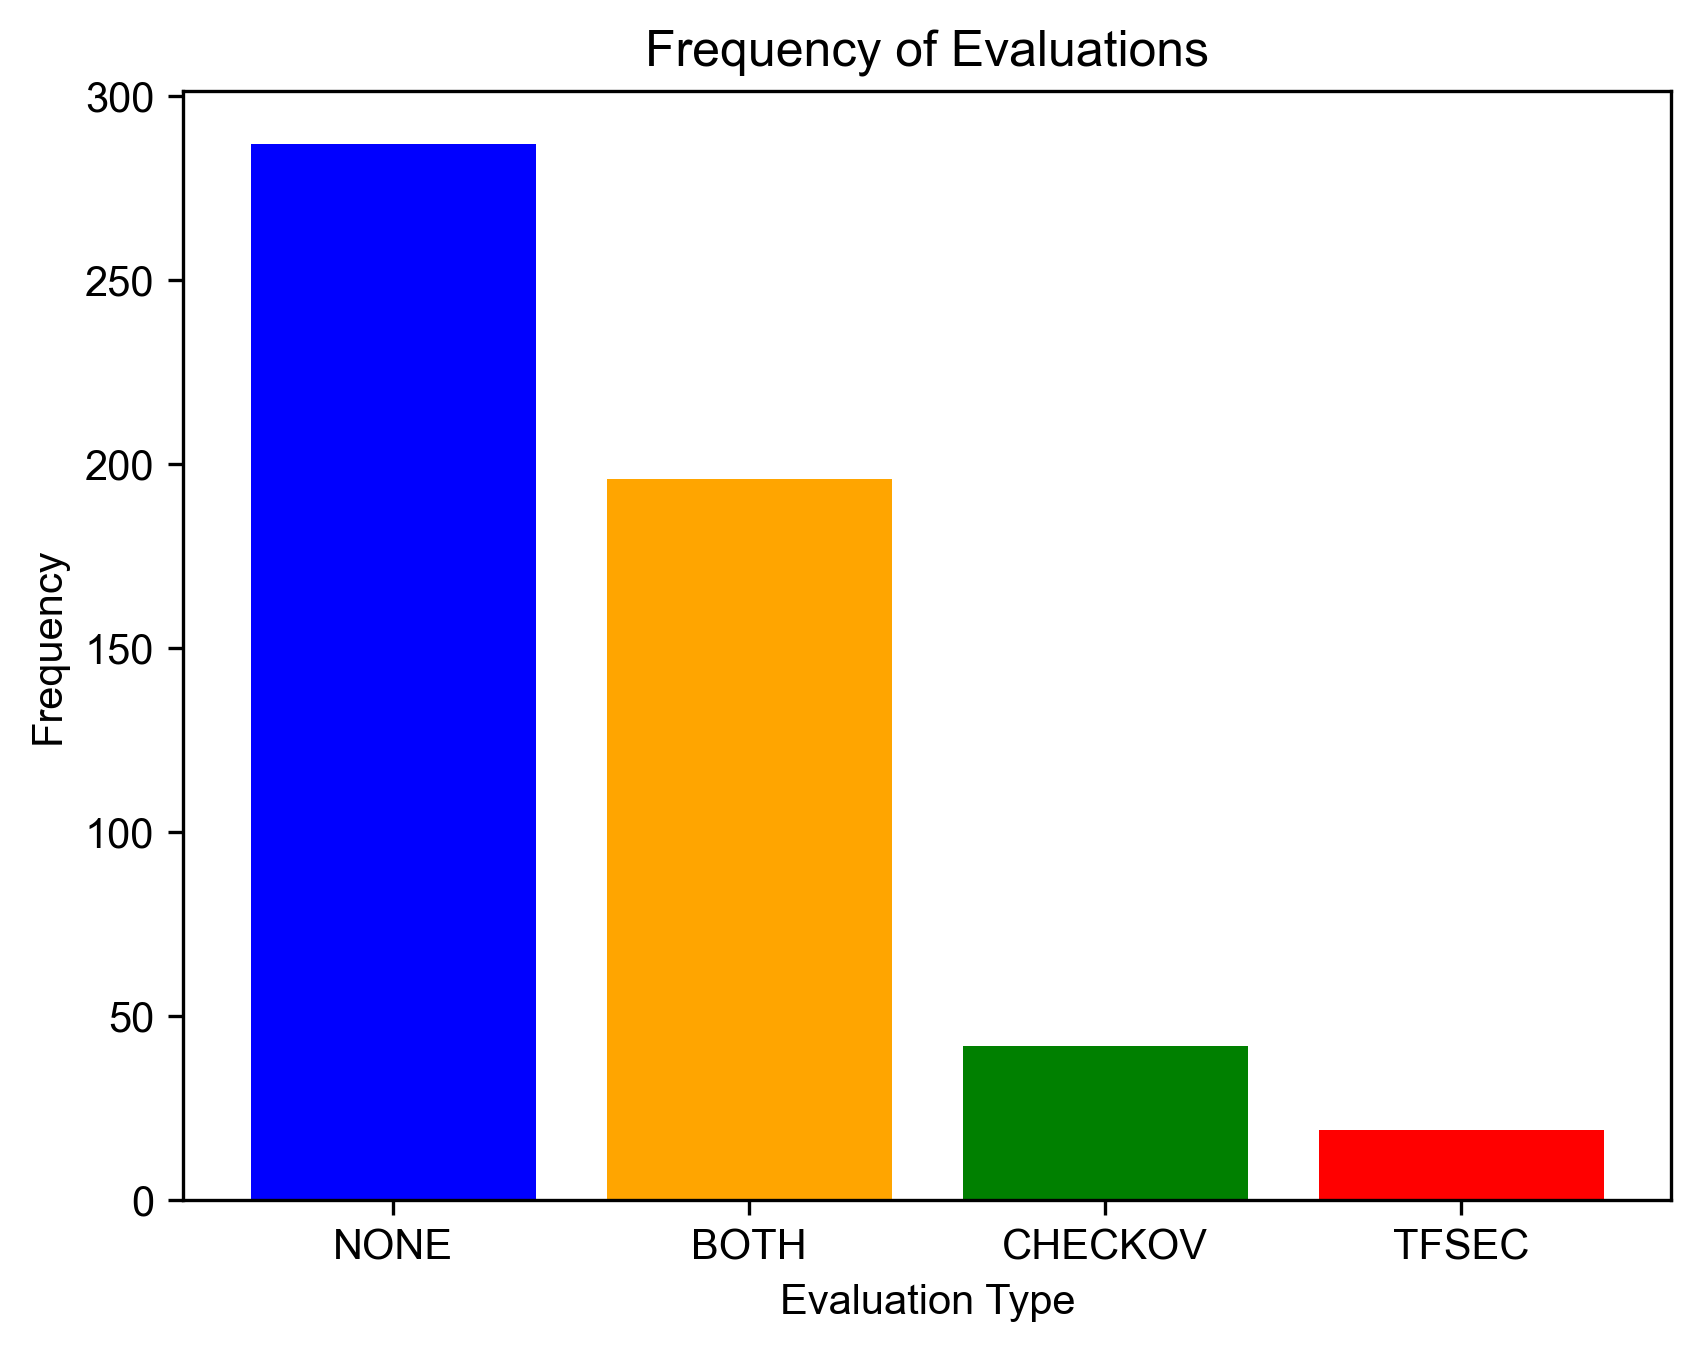

In [11]:
output = []
for project in results_checkov:
    result_project_tfsec = results_tfsec.get(project)
    result_project_checkov = results_checkov.get(project)
    if result_project_tfsec is not None and result_project_checkov is not None:
        for policy in policies_tfsec:
            tfsec_pol_id = policies_tfsec.get(policy)[0]
            checkov_pol_id = policies_checkov.get(policy)[0]
            evaluation = ""
            if checkov_pol_id in result_project_checkov[0] and tfsec_pol_id in result_project_tfsec[0]:
                evaluation = "BOTH"
            if checkov_pol_id in result_project_checkov[0] and tfsec_pol_id in result_project_tfsec[1]:
                evaluation = "CHECKOV"
            if checkov_pol_id in result_project_checkov[1] and tfsec_pol_id in result_project_tfsec[0]:
                evaluation = "TFSEC"
            if checkov_pol_id in result_project_checkov[1] and tfsec_pol_id in result_project_tfsec[1]:
                evaluation = "NONE"

            if evaluation != "":
                output.append([project, policy, evaluation])

import matplotlib.pyplot as plt

# Count the frequency of each evaluation
evaluation_counts = {}
for project_name, policy_id, evaluation in output:
    if evaluation in evaluation_counts:
        evaluation_counts[evaluation] += 1
    else:
        evaluation_counts[evaluation] = 1

# Prepare data for plotting
evaluations = list(evaluation_counts.keys())
counts = list(evaluation_counts.values())

# Create the bar chart
plt.bar(evaluations, counts, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Evaluation Type')
plt.ylabel('Frequency')
plt.title('Frequency of Evaluations')
plt.show()


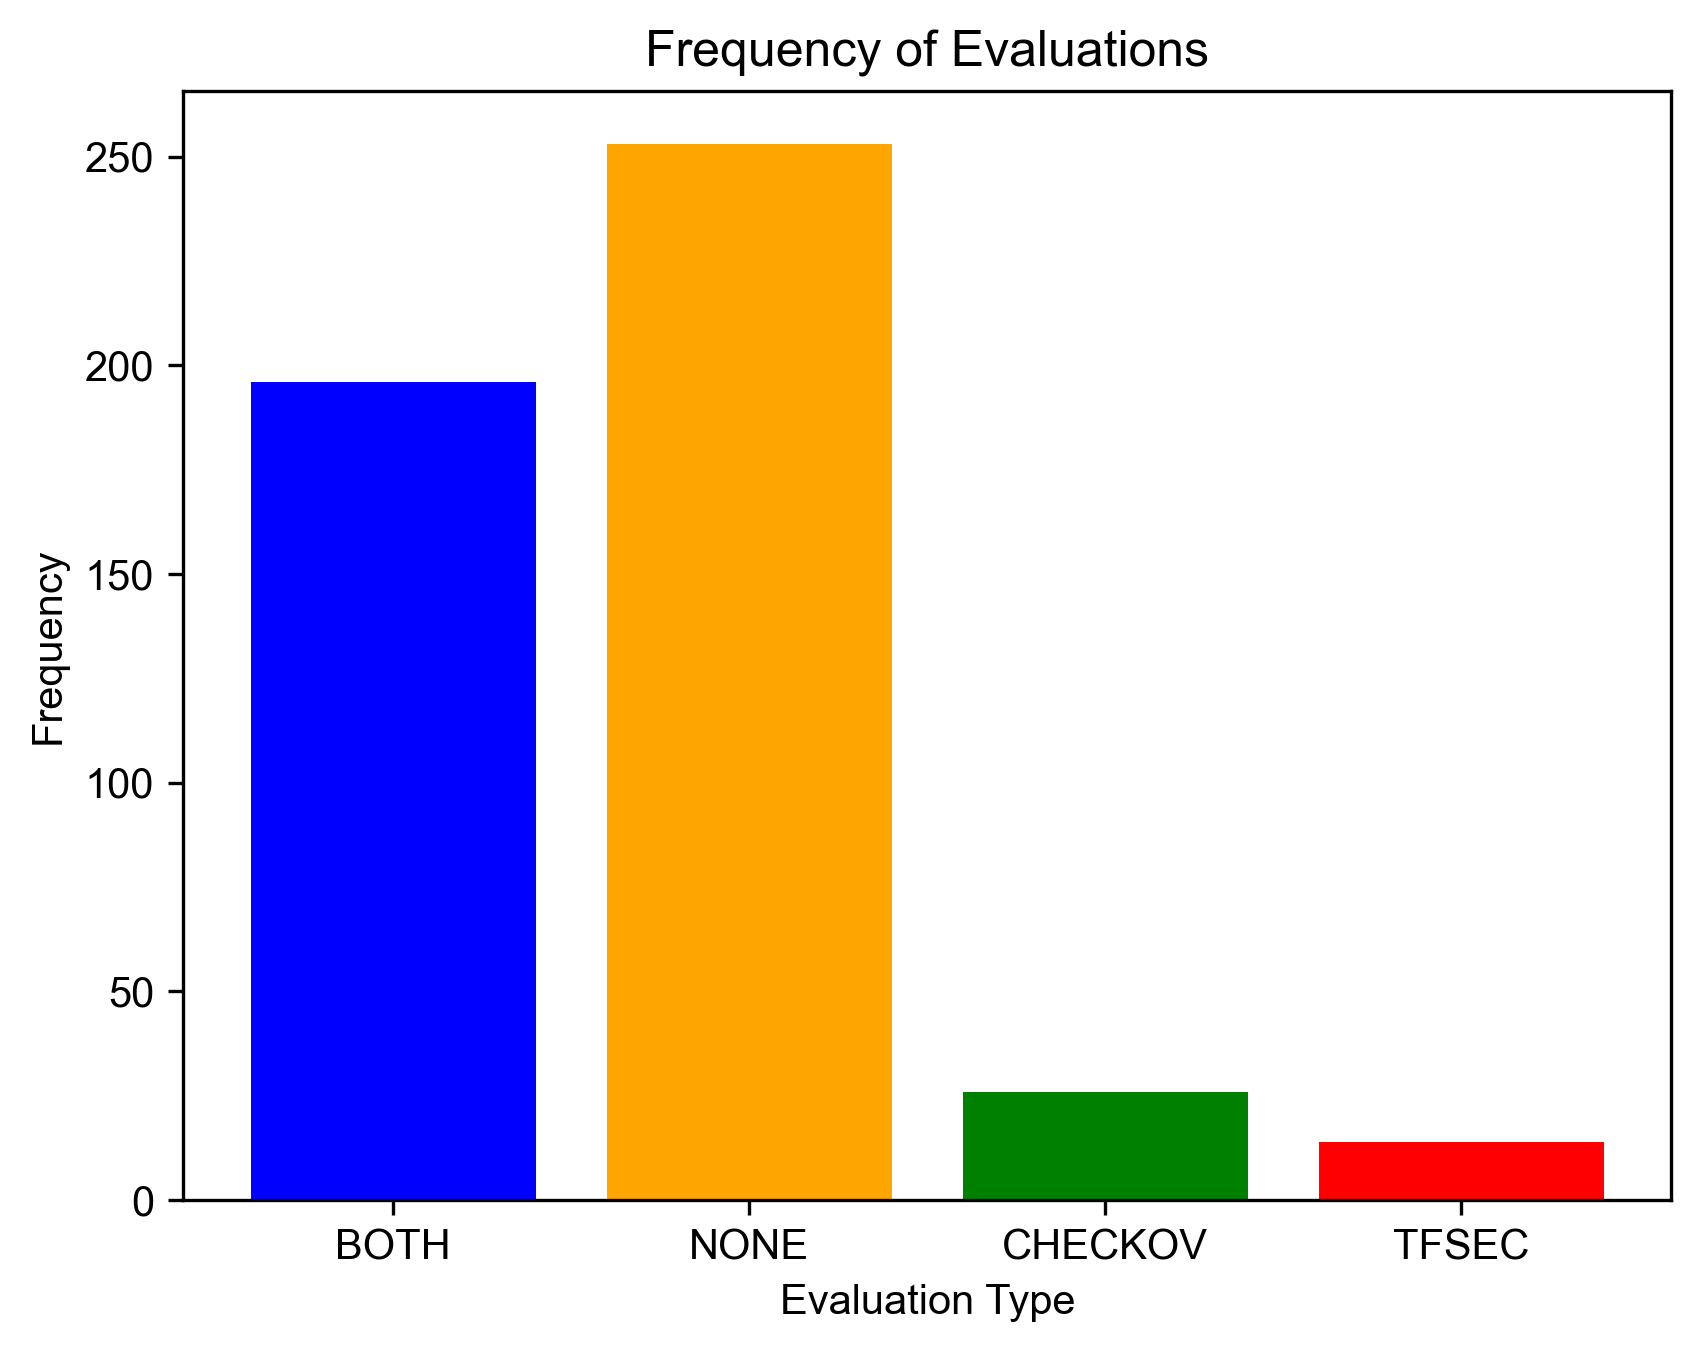

CSV file 'distribution_by_coverage_gcp.csv' has been created.


In [12]:
results_tfsec = {}
results_checkov = {}
with open(RESULTS_FILE_TFSEC, 'r') as f:
    f.readline()
    policies_rows = f.readlines()
    for row in policies_rows:
        s_row = row.split(',')
        repo_name = s_row[0]
        passed_check = s_row[3].split(";")
        failed_check = s_row[4].split(";")

        results_tfsec[repo_name] = [passed_check, failed_check]

with open(RESULTS_FILE_GCP, 'r') as f:
    f.readline()
    policies_rows = f.readlines()
    for row in policies_rows:
        s_row = row.split(',')
        repo_name = s_row[0]
        passed_check = s_row[3].split(";")
        failed_check = s_row[4].split(";")

        results_checkov[repo_name] = [passed_check, failed_check]

output = []
for project in results_checkov:
    result_project_tfsec = results_tfsec.get(project)
    result_project_checkov = results_checkov.get(project)
    if result_project_tfsec is not None and result_project_checkov is not None:
        for policy in policies_tfsec:
            tfsec_pol_id = policies_tfsec.get(policy)[0]
            checkov_pol_id = policies_checkov.get(policy)[0]
            evaluation = ""
            if (checkov_pol_id in result_project_checkov[0] and not checkov_pol_id in result_project_checkov[1]) \
                    and (tfsec_pol_id in result_project_tfsec[0] and not tfsec_pol_id in result_project_tfsec[1]):
                evaluation = "BOTH"
            if (checkov_pol_id in result_project_checkov[0] and not checkov_pol_id in result_project_checkov[1]) \
                        and (tfsec_pol_id in result_project_tfsec[1] and not tfsec_pol_id in result_project_tfsec[0]):
                evaluation = "CHECKOV"
            if (checkov_pol_id in result_project_checkov[1] and not checkov_pol_id in result_project_checkov[0]) \
                    and (tfsec_pol_id in result_project_tfsec[0] and not tfsec_pol_id in result_project_tfsec[1]):
                evaluation = "TFSEC"
            if (checkov_pol_id in result_project_checkov[1] and not checkov_pol_id in result_project_checkov[0]) \
                    and (tfsec_pol_id in result_project_tfsec[1] and not tfsec_pol_id in result_project_tfsec[0]):
                evaluation = "NONE"

            if evaluation != "":
                output.append([project, policy, evaluation])

import matplotlib.pyplot as plt

# Count the frequency of each evaluation
evaluation_counts = {}
for project_name, policy_id, evaluation in output:
    if evaluation in evaluation_counts:
        evaluation_counts[evaluation] += 1
    else:
        evaluation_counts[evaluation] = 1

# Prepare data for plotting
evaluations = list(evaluation_counts.keys())
counts = list(evaluation_counts.values())

# Create the bar chart
plt.bar(evaluations, counts, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Evaluation Type')
plt.ylabel('Frequency')
plt.title('Frequency of Evaluations')
plt.show()

import csv

with open('./csv/distribution_by_coverage_gcp.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Write header
    writer.writerow(['Project Name', 'Policy ID', 'Evaluation'])

    # Write data
    writer.writerows(output)

print("CSV file 'distribution_by_coverage_gcp.csv' has been created.")